In [50]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-4ubuntu4).
libgconf-2-4 is already the newest version (3.2.6-6ubuntu1).
xvfb is already the newest version (2:1.20.13-1ubuntu1~20.04.8).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [51]:
!wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"

--2023-04-29 14:34:19--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia601802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl [following]
--2023-04-29 14:34:20--  https://ia601802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia601802.us.archive.org (ia601802.us.archive.org)... 207.241.227.72
Connecting to ia601802.us.archive.org (ia601802.us.archive.org)|207.241.227.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl.1’

AgesAndHeights.pkl. 100%[===================>]   2.35K  --.-KB/s    in 0s      

2023-04-29 14:34:20 (288 MB/s) - ‘AgesAndHeights.pkl.1’ saved [2406/2406]



In [52]:
data = pd.read_pickle("/content/AgesAndHeights.pkl")
data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [53]:
data = data[data["Age"] > 0]

ages = data["Age"]
heights = data["Height"]

<Axes: xlabel='Age', ylabel='Height'>

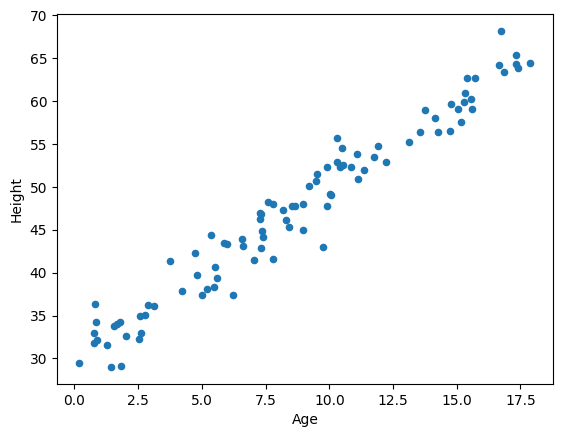

In [54]:
data.plot.scatter(x="Age", y="Height")

In [55]:
fig = px.scatter(x=ages, y=heights, title="Age and Height Correlation", labels={"x": "Age (years)",
                                                                                "y": "Height (inches)"})
fig.show()

In [56]:
ages_np = ages.to_numpy()
heights_np = heights.to_numpy()

ages_np_reshaped = ages_np.reshape(len(ages), 1)

In [57]:
model = LinearRegression().fit(ages_np_reshaped, heights_np)
model.coef_ # slope

array([2.0014169])

In [58]:
x_new = np.array(list(range(19))).reshape(19, 1) # untuk membuat garis lurus
preds = model.predict(x_new)

fig = px.scatter(x=ages, y=heights, title="Age and Height Correlation", labels={"x": "Age (years)",
                                                                                "y": "Height (inches)"})
fig.add_trace(go.Scatter(x=x_new.reshape(19), y=preds, mode="lines", name="Model")) # garis
fig.write_image("base.svg", width=800)
fig.show()

In [59]:
from joblib import dump, load

In [60]:
dump(model, "model.joblib")

['model.joblib']

In [61]:
model_in = load("model.joblib")
model_in.predict(np.array([[1]]))

array([31.96327451])

In [62]:
def make_picture(train_data_file, model, new_data_np, output_file):
  data = pd.read_pickle(train_data_file)
  data = data[data["Age"] > 0]

  ages = data["Age"]
  heights = data["Height"]

  x_new = np.array(list(range(19))).reshape(19, 1) # untuk membuat garis lurus
  preds = model.predict(x_new)

  fig = px.scatter(x=ages, y=heights, title="Age and Height Correlation", labels={"x": "Age (years)",
                                                                                  "y": "Height (inches)"})
  fig.add_trace(go.Scatter(x=x_new.reshape(19), y=preds, mode="lines", name="Model")) # garis

  # new input data
  new_preds = model.predict(new_data_np)
  fig.add_trace(go.Scatter(x=new_data_np.reshape(len(new_data_np)), y=new_preds, name="New Predictions", mode="markers", marker=dict(color="orange", size=15)))

  fig.write_image(output_file, width=800)
  fig.show()

In [63]:
def input_to_np(input):
  def is_float(s):
    try:
      float(s)
      return True
    except:
      return False
  floats = np.array([float(x) for x in input.split(",") if is_float(x)])
  return floats.reshape(len(floats), 1)

In [64]:
make_picture("/content/AgesAndHeights.pkl", model_in, input_to_np("1,     3.4   ,   "), "x.svg")